# Sklearn


The purpose of this notebook is to get you familair with the sklearn API for clustering.



** 1. ** Apply each Hierarachical, Kmeans and DBSCAN to the bellow dataset.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [5]:
X1, y1 = make_blobs(n_samples=1000, centers=5, n_features=2,cluster_std = 0.7 , random_state=0)
X2, y2 = make_moons(n_samples =1000,noise=0.1)
X3, y3 = make_circles(1000,noise=0.01)

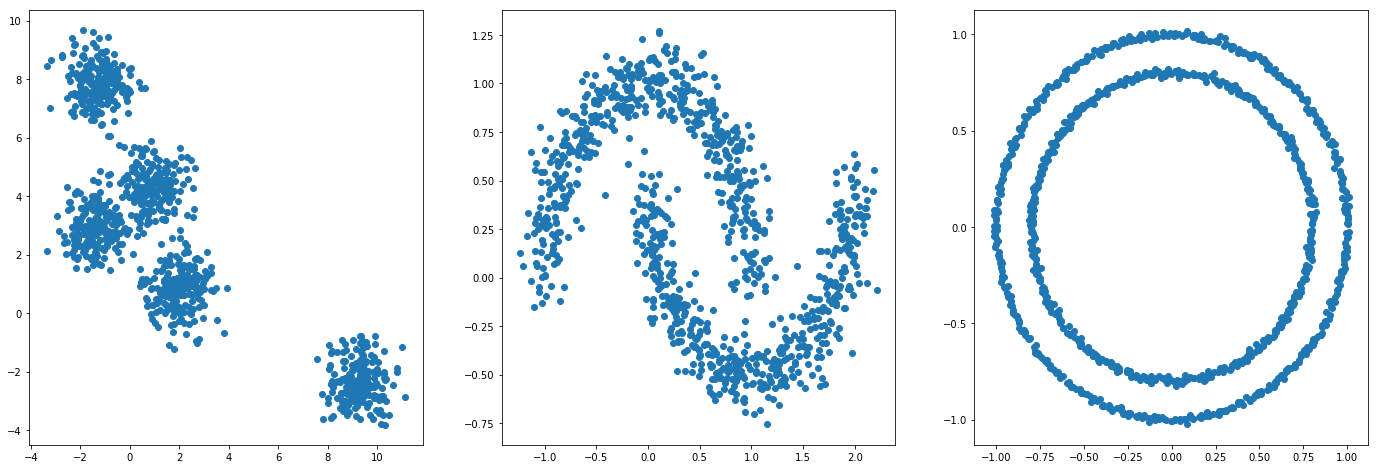

In [6]:
fig, axes = plt.subplots(1,3,figsize=(24,8))

for i,X in enumerate([X1,X2,X3]):
    axes[i].scatter(X[:,0],X[:,1])

** 2. ** In each case evalualte how we'll each clustering methods did using accuracy?

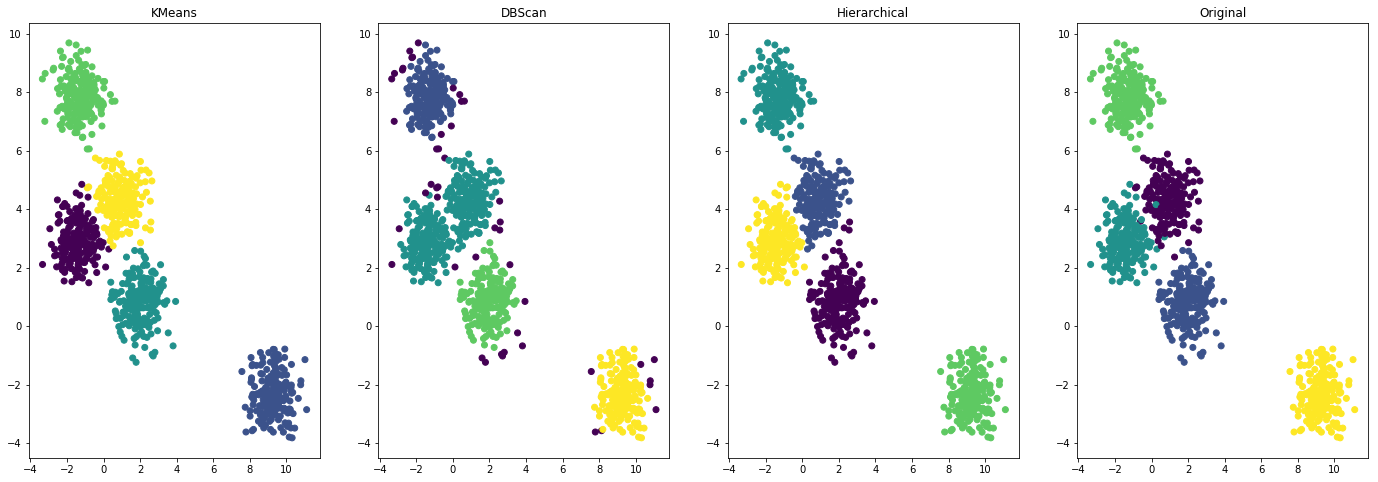

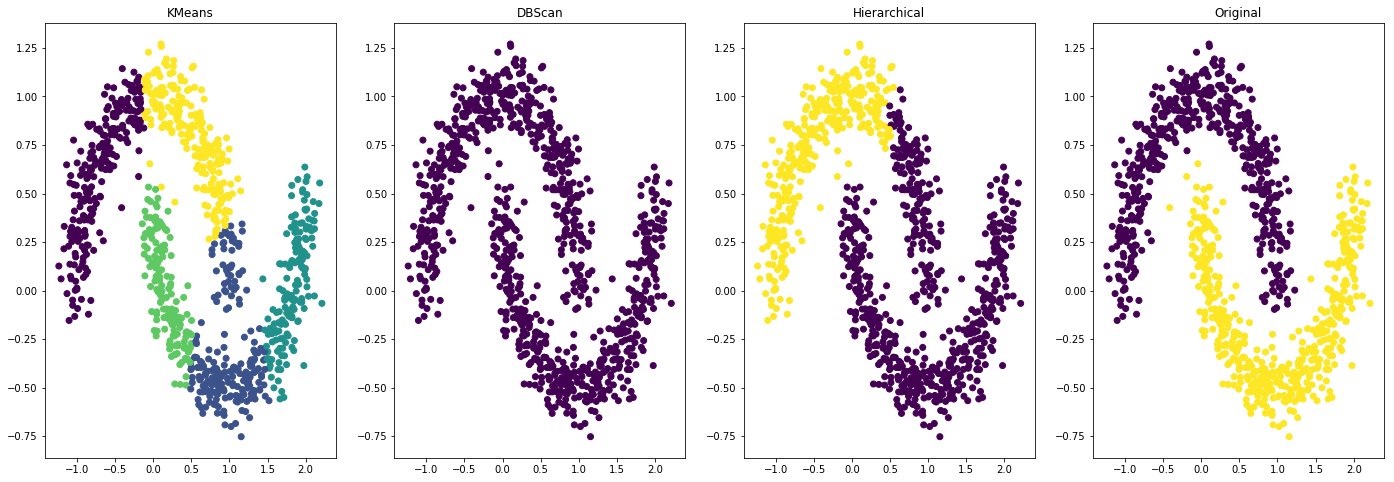

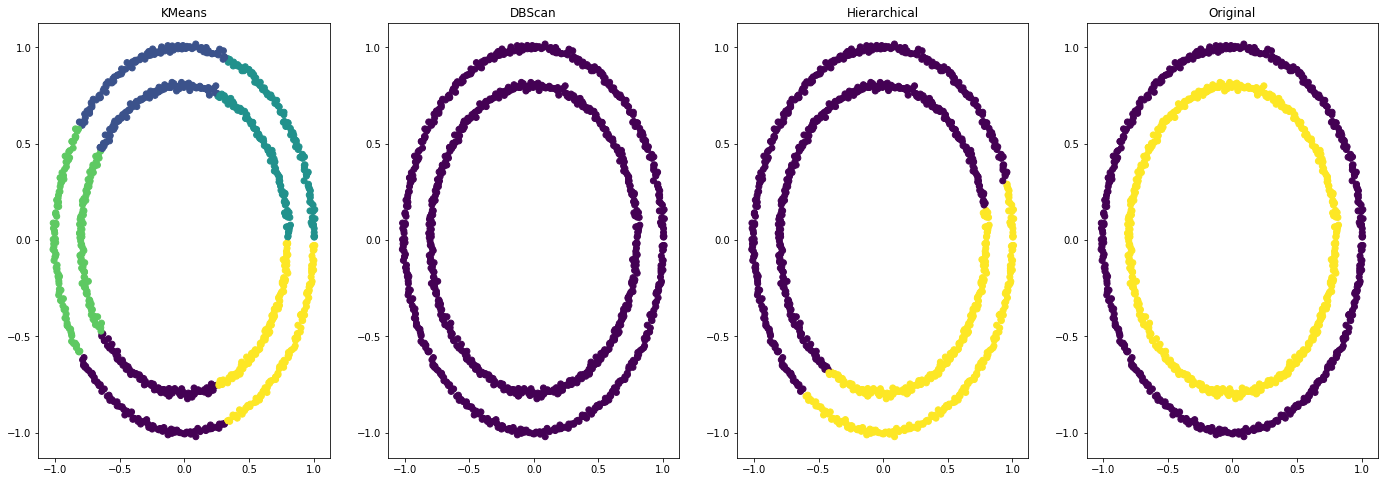

In [44]:
lX = [X1, X2, X3]
ly = [y1, y2, y3]
lk = [5, 2, 2]

for i in range(3):
    X = lX[i]
    k = lk[i]
    y = ly[i]
    kmeans = KMeans(n_clusters= k).fit(X)
    dbscan1 = DBSCAN(eps= 0.4, min_samples = 5).fit(X)
    hierac1 = AgglomerativeClustering(n_clusters=k).fit(X)

    fig, axes = plt.subplots(1,4,figsize=(24,8))
    axes[0].scatter(X[:,0], X[:,1], c = kmeans1.fit_predict(X))
    axes[0].set_title("KMeans")
    axes[1].scatter(X[:,0], X[:,1], c = dbscan1.fit_predict(X))
    axes[1].set_title("DBScan")
    axes[2].scatter(X[:,0], X[:,1], c = hierac1.fit_predict(X))
    axes[2].set_title("Hierarchical")
    axes[3].set_title("Original")
    axes[3].scatter(X[:,0], X[:,1], c = y)

** 3. ** For each case which algorithm did best? Can you expalin why?

** 4. ** Pick one algorithm and tweak it's parameters, can you improve the accuracy?

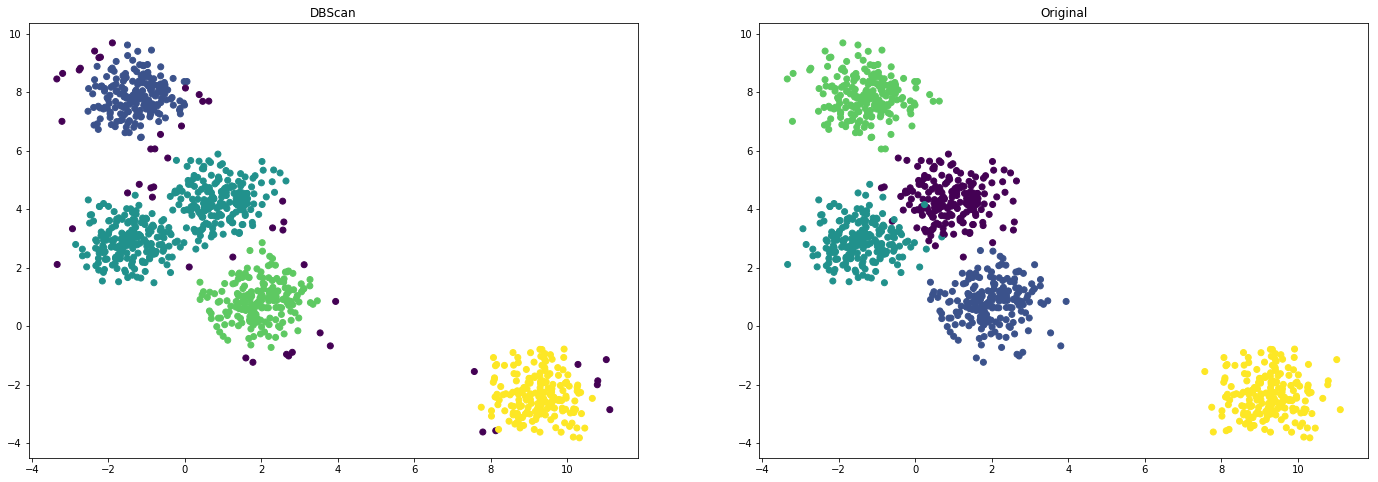

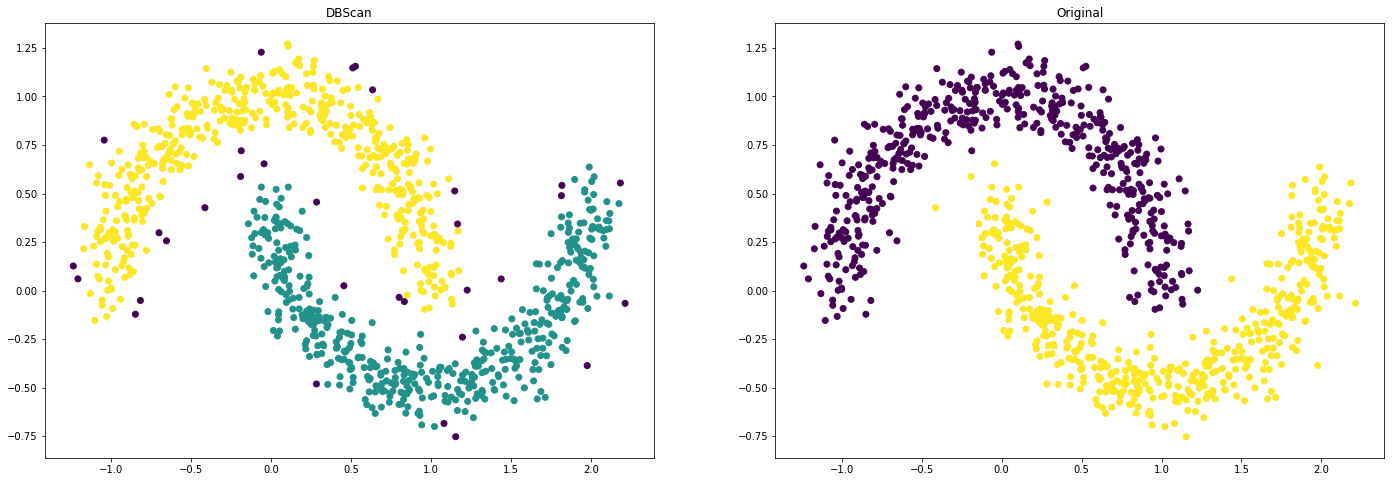

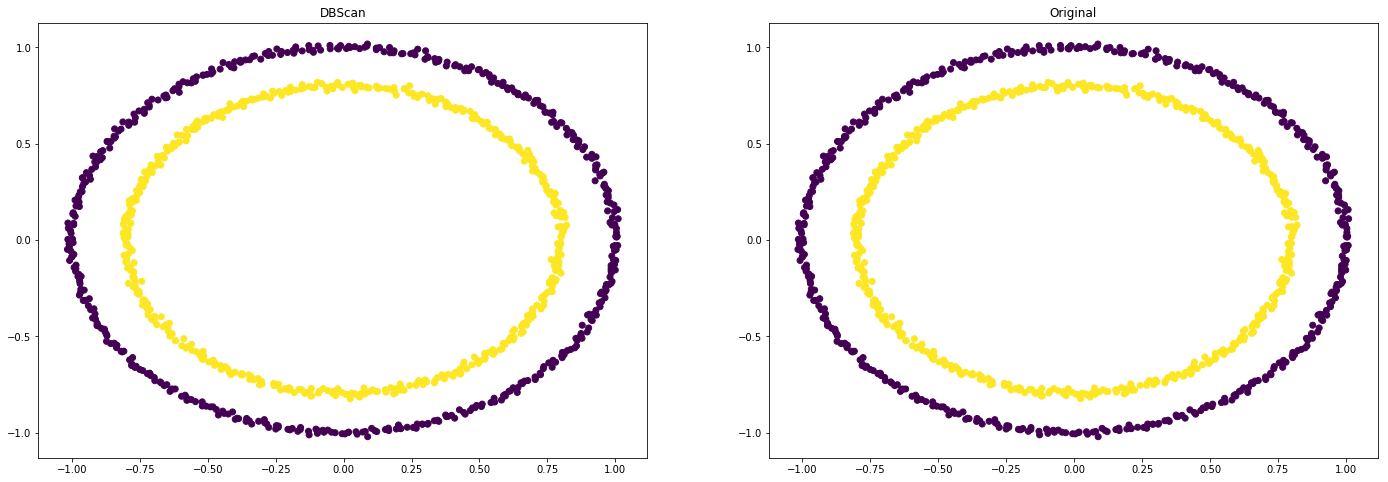

In [48]:
lX = [X1, X2, X3]
ly = [y1, y2, y3]
l_eps = [0.4, 0.1, 0.1]
l_min_sam = [5, 5, 5]

for i in range(3):
    X = lX[i]
    i_eps = l_eps[i]
    i_min_sam = l_min_sam[i]
    y = ly[i]
    #kmeans = KMeans(n_clusters= k).fit(X)
    dbscan1 = DBSCAN(eps= i_eps, min_samples = i_min_sam).fit(X)
    #hierac1 = AgglomerativeClustering(n_clusters=k).fit(X)

    fig, axes = plt.subplots(1,2,figsize=(24,8))
#     axes[0].scatter(X[:,0], X[:,1], c = kmeans1.fit_predict(X))
#     axes[0].set_title("KMeans")
    axes[0].scatter(X[:,0], X[:,1], c = dbscan1.fit_predict(X))
    axes[0].set_title("DBScan")
#     axes[2].scatter(X[:,0], X[:,1], c = hierac1.fit_predict(X))
#     axes[2].set_title("Hierarchical")
    axes[1].set_title("Original")
    axes[1].scatter(X[:,0], X[:,1], c = y)

# Colour Compresion


A intresting application of clustering is colour compression. We can use k-means to cluster the pixels by there colour. After clustering we take the centroid, which will be the average of all of the pixels colour in a cluster, and use that as our new colour.

In [50]:
from sklearn.datasets import load_sample_image

In [55]:
import matplotlib.image as mpimg

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


(-0.5, 639.5, 426.5, -0.5)

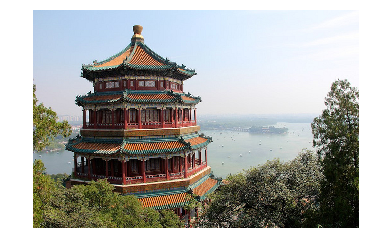

In [56]:
img = load_sample_image('china.jpg')
img = img / 255 # scale values
plt.imshow(img)
plt.axis('off')

** 1. ** Reshape the image to ((height * width ), n_channels).

In [79]:
hi, wi, chan = img.shape
img_new = img.reshape((hi * wi, chan))
"Org Shape: {}, New Shape: {}".format(img.shape, img_new.shape)

'Org Shape: (427, 640, 3), New Shape: (273280, 3)'

** 2. ** Fit kmeans on the model and predict what cluster each pixel is in.

In [91]:
kk = 6
img_kmeans = KMeans(n_clusters= kk).fit(img_new)

In [82]:
img_kmeans.labels_

array([12, 12, 12, ...,  1, 14, 14], dtype=int32)

** 3. ** What is the shape of the clusters cluster centers, and why is it this shape? What do the centroids represent ?

In [83]:
img_kmeans.cluster_centers_.shape

(30, 3)

We can use our prediction to index into 

In [92]:
y_pred = img_kmeans.fit_predict(img_new)

In [96]:
im_new = img_kmeans.cluster_centers_[y_pred]

** 5. ** Reshape the image back to it's original size and plot it.

In [97]:
im_new = im_new.reshape((hi,wi,chan))
im_new.shape

(427, 640, 3)

(-0.5, 639.5, 426.5, -0.5)

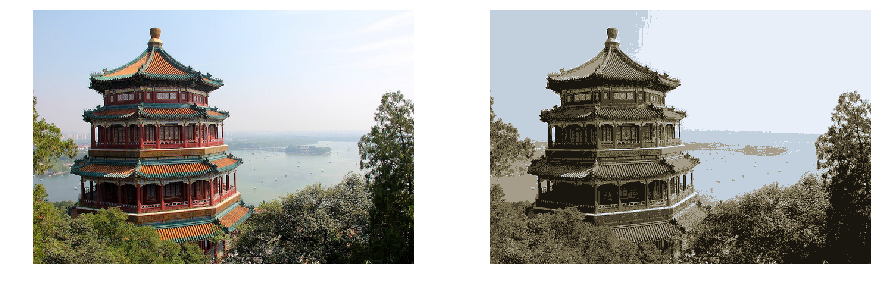

In [98]:
fig, axes = plt.subplots(1,2,figsize=(15,30))
axes[0].imshow(img)
axes[1].imshow(im_new)
axes[0].axis('off')
axes[1].axis('off')